In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = load_boston()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
pd_dataset = pd.DataFrame(dataset.data, columns=dataset.feature_names)
pd_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
pd_dataset['MEDV'] = dataset.target
pd_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
def lin_reg(b, W, X):
    y = 0
    for xi, wi in zip(X,W):
        y = y + xi*wi
    y += b
    return y

In [7]:
medv = pd_dataset['MEDV'].values
lstat = pd_dataset['LSTAT'].values
rm = pd_dataset['RM'].values

print("MEDV", medv[:10])
print("LSTAT", lstat[:10])
print("RM", rm[:10])

MEDV [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
LSTAT [ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1 ]
RM [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004]


In [8]:
b = 0
W = [1, 1]
Y = []

for l, r in zip(lstat, rm):
    X = [l, r]
    y = lin_reg(b, W, X)
    Y.append(y)

print(Y[:10])
print(medv[:10])

[11.555, 15.561, 11.215, 9.938, 12.477, 11.64, 18.442, 25.322, 35.561, 23.104]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


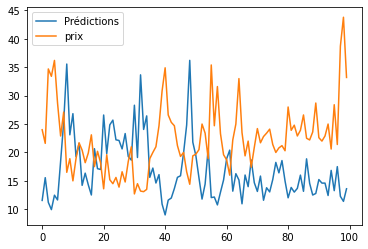

In [13]:
N = 100
plt.plot(Y[:N], label="Prédictions")
plt.plot(medv[:N], label='prix')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(medv, Y)
mse

230.31818060671938